#### Analyzing Neural Time Series Data
Python code for Chapter 5 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.io import loadmat

In [8]:
# Load sample data
EEG = loadmat('../data/sampleEEGdata.mat')['EEG'][0, 0]

In [9]:
# Define a function to perform the wavelet convolution
def wavelet_convolution(data, wavetime, EEG, n_conv, waveletfft):
    convolution_result_fft = ifft(waveletfft * fft(data, n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    convolution_result_fft = convolution_result_fft[int(np.floor(len(wavetime) / 2)) : -int(np.floor(len(wavetime) / 2))]
    return np.abs(convolution_result_fft) * 2

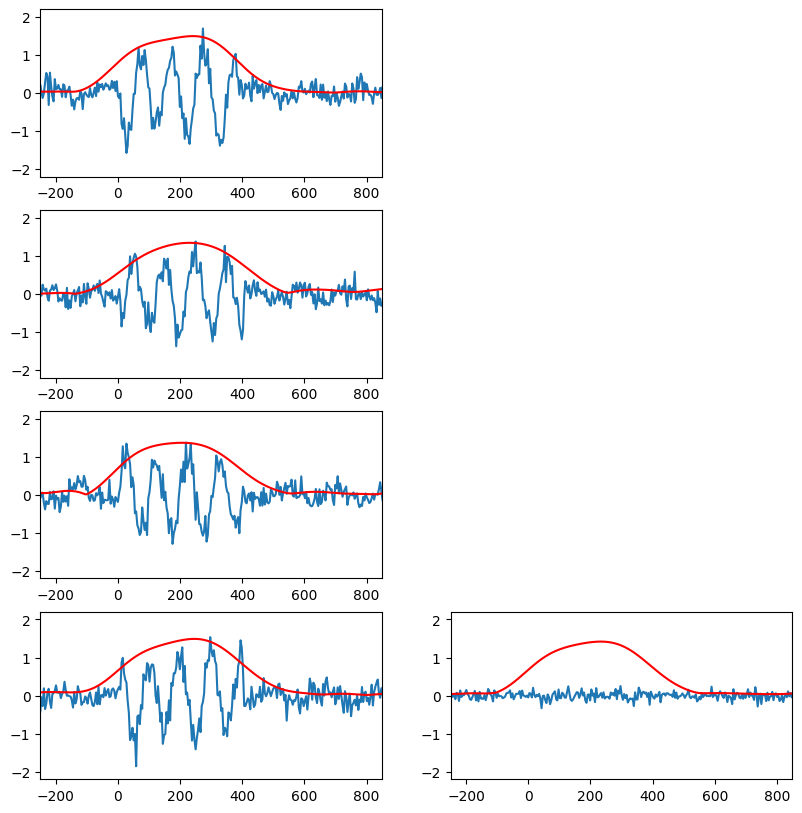

In [10]:
# Time-locked and non-phase-locked analysis

nTrials = 4
data = np.zeros((nTrials, EEG['pnts'][0][0]))

# Wavelet parameters
wavetime = np.arange(-1, 1 + 1/EEG['srate'][0][0], 1/EEG['srate'][0][0])
n_conv = len(wavetime) + EEG['pnts'][0][0] - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, EEG['pnts'][0][0]))

plt.figure(figsize=(15, 10))

for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * EEG['times'][0] / 1000 + 2 * np.pi * triali / nTrials - np.pi) + np.random.randn(EEG['pnts'][0][0]) / 6
    # Add non-phase-locked stimulus potential
    data[triali, 259:360] = data[triali, 259:360] + np.sin(2 * np.pi * 10 * EEG['times'][0][259:360] / 1000 + 2 * np.pi * triali / nTrials - np.pi) + np.random.randn(101) / 5
    
    # Convolve with 10Hz wavelet
    data10hz[triali, :] = wavelet_convolution(data[triali, :], wavetime, EEG, n_conv, waveletfft)
    
    # Plot single trials
    plt.subplot(nTrials, 3, (triali) * 3 + 1)
    plt.plot(EEG['times'][0], data[triali, :])
    plt.plot(EEG['times'][0], data10hz[triali, :], 'r')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])

# Plot the mean over trials
plt.subplot(nTrials, 3, (triali) * 3 + 2)
plt.plot(EEG['times'][0], np.mean(data, axis=0))
plt.plot(EEG['times'][0], np.mean(data10hz, axis=0), 'r')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.show()

In [11]:
# Time-locked and phase-locked analysis

# The code for this section is very similar to the previous block.
# The main difference is in the way the non-phase-locked stimulus potential is added.
# Instead of adding a phase shift that depends on the trial number, the phase shift is constant across trials.
# You can copy the previous block and make the necessary adjustments.

In [12]:
# Non-time-locked and phase-locked analysis

# Again, the code for this section is similar to the previous blocks.
# The main difference is in the way the event times for the non-phase-locked stimulus potential are determined.
# Instead of being fixed, the event times are randomly selected for each trial.
# You can copy the previous block and make the necessary adjustments.